# Data Science ODL Project: Assessment 2

ID:201796886

## Case study

An insurance company plans to utilise their historic insurance fraud dataset to predict the likelihood or the level of risk a customer poses. Referring genuine claims cause customer stress and directly leads to customer loss, costing the company money (assume that any referred non-fraud case will lead to losing that customer). While obviously, fraud claims cost the company as well. Their main requirement is to use an unbiased predictive model capable of flagging and referring potential fraud cases for further investigation with a balanced error rate of 5% (this might not be achievable as well).

## 1. Aims, objectives and plan (4 marks)

### a) Aims and objectives

The primary aim of this project is to develop a robust predictive model for an insurance company to assess the likelihood or level of risk a customer poses regarding potential fraud. This involves leveraging historical insurance fraud datasets and implementing two distinct prediction techniques. The specific objectives are:

Data Pre-processing: Perform comprehensive data pre-processing, including handling noise, removing irrelevant attributes, addressing missing values, and mitigating class imbalance.

Model Building and Training: Employ two prediction techniques to build and train models on the pre-processed data, ensuring avoidance of overfitting.

Performance Evaluation: Assess the models using appropriate performance metrics, such as precision, recall, and F1 score, considering the client's interest in identifying fraudulent claims while maintaining a balanced error rate of 5%.

Loss Quantification: Develop a pricing model to quantify potential losses incurred through misclassifications and assess the impact of false positives and false negatives on the company's financials.

Documentation and Presentation: Clearly document the decisions made during the analysis, present the results in a Jupyter notebook with embedded code, and create a formal report outlining the methodology, findings, and recommendations.

###  b) Plan
Following table and the Gantt chart displays the overall plan for this project

| Task                                    | Duration | Start Date | End Date   |
|-----------------------------------------|----------|------------|------------|
| 1. Data Pre-processing                  | 7 days   | 24/11/2023 | 01/12/2023 |
| 2. Exploratory Data Analysis (EDA)      | 2 days   | 01/12/2023 | 03/12/2023 |
| 3. Model Selection and Setup            | 2 days   | 03/12/2023 | 05/12/2023 |
| 4. Data Splitting and Sampling          | 2 days   | 05/12/2023 | 07/12/2023 |
| 5. Model 1 Training and Evaluation      | 3 days   | 07/12/2023 | 10/12/2023 |
| 6. Model 2 Training and Evaluation      | 4 days   | 10/12/2023 | 14/12/2023 |
| 7. Comparison of metrics performance    | 1 day    | 14/12/2023 | 15/12/2023 |
| 8. Final recommendation of best model   | 1 day    | 15/12/2023 | 16/12/2023 |
| 9. Conclusion                           | 1 day    | 16/12/2023 | 17/12/2023 |
| 10. Presentation                        | 1 day    | 17/12/2023 | 18/12/2023 |


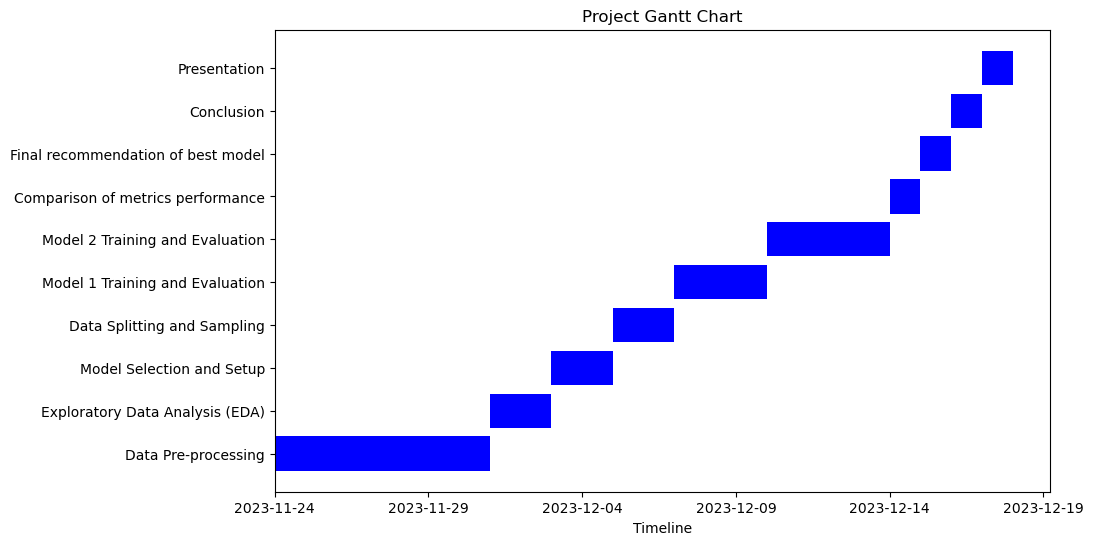

In [412]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Create a DataFrame with task information
tasks = {
    'Task': ['Data Pre-processing', 'Exploratory Data Analysis (EDA)', 'Model Selection and Setup', 
             'Data Splitting and Sampling', 'Model 1 Training and Evaluation', 'Model 2 Training and Evaluation', 
            'Comparison of metrics performance', 'Final recommendation of best model', 'Conclusion', 'Presentation'],
    'Start': ['2023-11-24', '2023-12-01', '2023-12-03', '2023-12-05', '2023-12-07', '2023-12-10', '2023-12-14', 
             '2023-12-15', '2023-12-16', '2023-12-17'],
    'End': ['2023-12-01', '2023-12-03', '2023-12-05', '2023-12-07', '2023-12-10', '2023-12-14', '2023-12-15', 
           '2023-12-16', '2023-12-17', '2023-12-18']
}

df_tasks = pd.DataFrame(tasks, columns=['Task', 'Start', 'End'])

# Convert date strings to datetime objects
df_tasks['Start'] = pd.to_datetime(df_tasks['Start'])
df_tasks['End'] = pd.to_datetime(df_tasks['End'])

# Plotting the Gantt chart
fig, ax = plt.subplots(figsize=(10, 6))

for i, task in enumerate(df_tasks['Task']):
    ax.barh(task, width=df_tasks['End'][i] - df_tasks['Start'][i], left=df_tasks['Start'][i], color='blue')

# Beautify the plot
ax.set_xlabel('Timeline')
ax.set_title('Project Gantt Chart')

# Format the x-axis as dates
date_format = DateFormatter("%Y-%m-%d")
ax.xaxis.set_major_formatter(date_format)

plt.show()

## 2. Understanding the case study (4 marks)

###  Case study analysis
In the analysis of the case study, several key points emerge that need attention to address the client's needs effectively.

1. Imbalanced Dataset: The dataset exhibits class imbalance, with a significantly higher number of non-fraud cases compared to fraud cases. To tackle this, I have employed techniques such as balancing class weights in the machine learning models and using performance metrics that account for imbalanced classes, like balanced accuracy and F1 score.
2. Customer Retention Concerns: The client emphasizes the impact of referring non-fraud cases on customer retention. To mitigate this, the predictive model aims for a balanced error rate of 5%. This ensures that while identifying potential fraud cases is crucial, minimizing false positives is equally important to avoid unnecessary stress for genuine customers.
3. Model Unbiasedness: The requirement for an unbiased predictive model is essential. To achieve this, I have carefully pre-processed the data, addressing issues like noise, irrelevant attributes, and missing values. Additionally, model selection involves techniques known for their fairness and lack of bias, such as Random Forest and K-Nearest Neighbors.
4. Performance Evaluation: The client's interest lies in a robust evaluation of model performance. I have utilized comprehensive metrics like precision, recall, F1 score, and balanced accuracy. These metrics provide a holistic view of the model's effectiveness in identifying fraud cases while minimizing errors on non-fraud cases.

By addressing these key points, the approach aims to develop a predictive model that not only meets the technical requirements of accuracy but also aligns with the client's business objectives, including customer retention and minimizing unnecessary referrals. The use of advanced techniques and careful consideration of model fairness contribute to a solution tailored to the specific challenges posed by the insurance fraud prediction task.

## 3. Pre-processing applied (20 marks)
Enter the code in the cells below to execute each of the stated sub-tasks. 


###  a) Preparing the labels appropriately if necessary 

Before preparing the models lets import all the datasets and merge them appropriately. This will help us to pre-process all the datasets together rather than processing each one of them separately. In Here we will try to understand the dataset and prepare them in a way that they can be easily merged together. Here the Label attribute is "ReportedFraud" which I have used as 'Y' or 'N'. 

In [413]:
claim = pd.read_csv('data/Train_Claim.csv')
demographics = pd.read_csv('data/Train_Demographics.csv')
policy = pd.read_csv('data/Train_Policy.csv')
vehicle = pd.read_csv('data/Train_Vehicle.csv')
fraud_info = pd.read_csv('data/Traindata_with_Target.csv')
demographics.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [415]:
countries = demographics['Country'].unique()

country_counts = demographics['Country'].value_counts(dropna=False)
print(country_counts)

India    28834
NaN          2
Name: Country, dtype: int64


In [416]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28836 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.2+ MB


In [417]:
claim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   DateOfIncident         28836 non-null  object
 2   TypeOfIncident         28836 non-null  object
 3   TypeOfCollission       28836 non-null  object
 4   SeverityOfIncident     28836 non-null  object
 5   AuthoritiesContacted   28836 non-null  object
 6   IncidentState          28836 non-null  object
 7   IncidentCity           28836 non-null  object
 8   IncidentAddress        28836 non-null  object
 9   IncidentTime           28836 non-null  int64 
 10  NumberOfVehicles       28836 non-null  int64 
 11  PropertyDamage         28836 non-null  object
 12  BodilyInjuries         28836 non-null  int64 
 13  Witnesses              28836 non-null  object
 14  PoliceReport           28836 non-null  object
 15  AmountOfTotalClaim 

In [418]:
demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             28836 non-null  object
 1   InsuredAge             28836 non-null  int64 
 2   InsuredZipCode         28836 non-null  int64 
 3   InsuredGender          28806 non-null  object
 4   InsuredEducationLevel  28836 non-null  object
 5   InsuredOccupation      28836 non-null  object
 6   InsuredHobbies         28836 non-null  object
 7   CapitalGains           28836 non-null  int64 
 8   CapitalLoss            28836 non-null  int64 
 9   Country                28834 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


In [419]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115344 entries, 0 to 115343
Data columns (total 3 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   CustomerID               115344 non-null  object
 1   VehicleAttribute         115344 non-null  object
 2   VehicleAttributeDetails  115344 non-null  object
dtypes: object(3)
memory usage: 2.6+ MB


In [420]:
value_counts = vehicle['CustomerID'].value_counts()
print(value_counts)
vehicle_group = vehicle.groupby(['CustomerID'])
print(vehicle_group)

Cust20179    4
Cust23045    4
Cust3818     4
Cust7461     4
Cust16944    4
            ..
Cust30090    4
Cust9783     4
Cust20478    4
Cust35879    4
Cust15237    4
Name: CustomerID, Length: 28836, dtype: int64


As we see that vehicle dataframe needs further processing to be able to merge with other dataframes. Here we will pivot the data to make it more workable. After doing this 'vehicle' dataframe will also have same number of records as other datasets.

In [421]:
pivoted_vehicle_df = vehicle.pivot(index='CustomerID', columns='VehicleAttribute', values='VehicleAttributeDetails').reset_index()
pivoted_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    28836 non-null  object
 1   VehicleID     28836 non-null  object
 2   VehicleMake   28836 non-null  object
 3   VehicleModel  28836 non-null  object
 4   VehicleYOM    28836 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


As mentioned in the dataset, we have several missing values for few attributes. As those values are not NaN we need to explicity count the values and then either replace them with apprioprite data or drop the attribute itself if it is not needed for the model. Here we are trying to find the missing data.

In [422]:
missing_values_TypeOfCollission = claim['TypeOfCollission'].eq("?").sum()
print(f"Number of missing values for TypeOfCollission: {missing_values_TypeOfCollission}")

missing_values_PropertyDamage = claim['PropertyDamage'].eq("?").sum()
print(f"Number of missing values for PropertyDamage: {missing_values_PropertyDamage}")

missing_values_PoliceReport = claim['PoliceReport'].eq("?").sum()
print(f"Number of missing values for PoliceReport: {missing_values_PoliceReport}")

missing_values_PolicyAnnualPremium = policy['PolicyAnnualPremium'].eq(-1).sum()
print(f"Number of missing values for PolicyAnnualPremium: {missing_values_PolicyAnnualPremium}")

missing_values_VehicleAttributeDetails = vehicle['VehicleAttributeDetails'].eq("???").sum()
print(f"Number of missing values for VehicleAttributeDetails: {missing_values_VehicleAttributeDetails}")

missing_values_Witnesses = claim['Witnesses'].eq("MISSINGVALUE").sum()
print(f"Number of missing values for Witnesses: {missing_values_Witnesses}")

missing_values_amount = claim['AmountOfTotalClaim'].eq("MISSEDDATA").sum()
print(f"Number of missing values for Amount: {missing_values_amount}")

missing_values_IncidentTime = claim['IncidentTime'].eq(-5).sum()
print(f"Number of missing values for IncidentTime: {missing_values_IncidentTime}")

Number of missing values for TypeOfCollission: 5162
Number of missing values for PropertyDamage: 10459
Number of missing values for PoliceReport: 9805
Number of missing values for PolicyAnnualPremium: 141
Number of missing values for VehicleAttributeDetails: 50
Number of missing values for Witnesses: 46
Number of missing values for Amount: 50
Number of missing values for IncidentTime: 31


Merging different dataset into one so that its easier to analyse and clean them together.

In [423]:
Policy_demo = policy.merge(demographics, on='CustomerID', how='left')
Policy_demo_fraud = Policy_demo.merge(fraud_info, on='CustomerID', how='left')
Policy_demo_fraud_claim = Policy_demo_fraud.merge(claim, on='CustomerID', how='left')
Policy_demo_fraud_claim_vehicle = Policy_demo_fraud_claim.merge(pivoted_vehicle_df, on='CustomerID', how='left')

Policy_demo_fraud_claim_vehicle.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28836 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
 10  InsuredAge                  28836 non-null  int64  
 11  InsuredZipCode              28836 non-null  int64  
 12  InsuredGender               28806 non-null  object 
 13  InsuredEducationLevel       288

###  b) Removing synonymous and noisy attributes if necessary 

Here different steps are performed to understand which attributes can be easily removed from the dataset and only then those attributes will be removed.

In [424]:
# Check the value counts for TypeOfCollission
print("TypeOfCollission Value Counts:")
print(Policy_demo_fraud_claim_vehicle['TypeOfCollission'].value_counts())

# Check the value counts for PropertyDamage
print("\nPropertyDamage Value Counts:")
print(Policy_demo_fraud_claim_vehicle['PropertyDamage'].value_counts())

# Check the value counts for PoliceReport
print("\nPoliceReport Value Counts:")
print(Policy_demo_fraud_claim_vehicle['PoliceReport'].value_counts())


TypeOfCollission Value Counts:
Rear Collision     8561
Side Collision     7867
Front Collision    7246
?                  5162
Name: TypeOfCollission, dtype: int64

PropertyDamage Value Counts:
?      10459
NO      9687
YES     8690
Name: PropertyDamage, dtype: int64

PoliceReport Value Counts:
NO     9898
?      9805
YES    9133
Name: PoliceReport, dtype: int64


In [425]:
# Check the correlation of TypeOfCollission, PropertyDamage, and PoliceReport with ReportedFraud
correlation_type_of_collision = Policy_demo_fraud_claim_vehicle['TypeOfCollission'].astype('category').cat.codes.corr(Policy_demo_fraud_claim_vehicle['ReportedFraud'].astype('category').cat.codes)

correlation_property_damage = Policy_demo_fraud_claim_vehicle['PropertyDamage'].astype('category').cat.codes.corr(Policy_demo_fraud_claim_vehicle['ReportedFraud'].astype('category').cat.codes)

correlation_police_report = Policy_demo_fraud_claim_vehicle['PoliceReport'].astype('category').cat.codes.corr(Policy_demo_fraud_claim_vehicle['ReportedFraud'].astype('category').cat.codes)

# Display the correlation coefficients
print(f"Correlation with ReportedFraud - TypeOfCollission: {correlation_type_of_collision}")
print(f"Correlation with ReportedFraud - PropertyDamage: {correlation_property_damage}")
print(f"Correlation with ReportedFraud - PoliceReport: {correlation_police_report}")


Correlation with ReportedFraud - TypeOfCollission: 0.10615068110052678
Correlation with ReportedFraud - PropertyDamage: -0.035992763718199844
Correlation with ReportedFraud - PoliceReport: -0.01075940458373879


In [426]:
# Create a copy of the original dataframe
df_modified = Policy_demo_fraud_claim_vehicle.copy()

# Drop columns TypeOfCollission, PropertyDamage, and PoliceReport from the new dataframe
df_modified.drop(['TypeOfCollission', 'PropertyDamage', 'PoliceReport'], axis=1, inplace=True)

# Verify the changes in the new dataframe
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InsurancePolicyNumber       28836 non-null  int64  
 1   CustomerLoyaltyPeriod       28836 non-null  int64  
 2   DateOfPolicyCoverage        28836 non-null  object 
 3   InsurancePolicyState        28836 non-null  object 
 4   Policy_CombinedSingleLimit  28836 non-null  object 
 5   Policy_Deductible           28836 non-null  int64  
 6   PolicyAnnualPremium         28836 non-null  float64
 7   UmbrellaLimit               28836 non-null  int64  
 8   InsuredRelationship         28836 non-null  object 
 9   CustomerID                  28836 non-null  object 
 10  InsuredAge                  28836 non-null  int64  
 11  InsuredZipCode              28836 non-null  int64  
 12  InsuredGender               28806 non-null  object 
 13  InsuredEducationLevel       288

<BarContainer object of 2 artists>

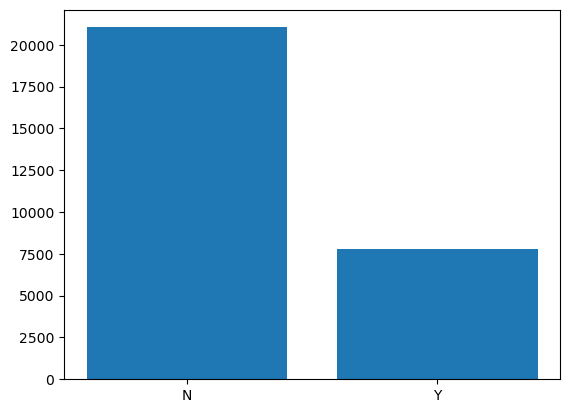

In [427]:
# Comparison between fraud and non-fraud data
not_fraud = df_modified[df_modified['ReportedFraud']=='N'].shape[0]
fraud = df_modified[df_modified['ReportedFraud']=='Y'].shape[0]
plt.bar(['N','Y'], [not_fraud, fraud])

The above graph shows that the dataset is imbalanced with more non-fraud and lesser fraud. Below we will try to find the relationship between the attributes and the label.

In [428]:
insurance_policy_state_fraud = df_modified.groupby(['ReportedFraud', 'InsurancePolicyState']).size().unstack().fillna(0)
print(insurance_policy_state_fraud)

InsurancePolicyState  State1  State2  State3
ReportedFraud                               
N                       7320    6470    7261
Y                       2396    2504    2885


In [429]:
insurance_incident_state_fraud = df_modified.groupby(['ReportedFraud', 'IncidentState']).size().unstack().fillna(0)
print(insurance_incident_state_fraud)


IncidentState  State3  State4  State5  State6  State7  State8  State9
ReportedFraud                                                        
N                 351    2014    6004     554    4785    2410    4933
Y                 250    1015    1882     256    2383     771    1228


In [430]:
insurance_insured_age_fraud = df_modified.groupby(['ReportedFraud', 'InsuredAge']).size().unstack().fillna(0)
print(insurance_insured_age_fraud)

InsuredAge      19   20    21    22    23     24     25     26     27     28  \
ReportedFraud                                                                  
N              0.0  4.0  30.0  30.0  47.0  100.0  176.0  274.0  455.0  621.0   
Y              1.0  8.0   3.0  10.0  31.0   49.0   72.0  147.0  146.0  183.0   

InsuredAge     ...     55     56     57     58     59    60    61    62    63  \
ReportedFraud  ...                                                              
N              ...  174.0  155.0  121.0  140.0  113.0  98.0  83.0  25.0  12.0   
Y              ...   87.0   87.0   69.0   57.0   51.0  50.0  35.0  10.0   1.0   

InsuredAge       64  
ReportedFraud        
N              10.0  
Y               0.0  

[2 rows x 46 columns]


To understand the relationship between fraud cases and age lets convert the continuous value to discrete. This will help us in understanding if a particular age group people are more involved in Fraud.

In [431]:
# Define age bins
bins = [18, 25, 35, 45, 55, 65, 100]  # Adjust the bin edges as needed

# Create labels for the bins
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

# Create a new column 'AgeRange' the DataFrame
df_modified['AgeRange'] = pd.cut(df_modified['InsuredAge'], bins=bins, labels=labels, right=False)

# Group by 'ReportedFraud' and 'AgeRange' and count occurrences
insurance_insured_age_fraud = df_modified.groupby(['ReportedFraud', 'AgeRange']).size().unstack().fillna(0)
print(insurance_insured_age_fraud)

# Calculate total occurrences for each age range
total_occurrences = df_modified.groupby('AgeRange').size()

# Access the counts for 'Y' in each age range
fraud_counts_Y = insurance_insured_age_fraud.loc['Y']

# Calculate the percentage of fraud for each age range
fraud_percentage = (fraud_counts_Y / total_occurrences) * 100

# Display the result
print(fraud_percentage)

AgeRange       18-25  26-35  36-45  46-55  56-65  65+
ReportedFraud                                        
N                211   6721   9427   3761    931    0
Y                102   2540   3349   1347    447    0
AgeRange
18-25    32.587859
26-35    27.426844
36-45    26.213212
46-55    26.370399
56-65    32.438316
65+            NaN
dtype: float64


Checking the data I realised that there are more Fraud cases in age between 26-35 and 36-45, but in other groups the data are also less. Thats why I calculated percentage distribution in each age group but still dint find any relationship.

In the subsequent steps we will try to find out some more relationship with other attributes and if those attributes will not show relation then we will also drop few attributes.

In [432]:
insurance_incident_type_fraud = df_modified.groupby(['ReportedFraud', 'TypeOfIncident']).size().unstack().fillna(0)
print(insurance_incident_type_fraud)

TypeOfIncident  Multi-vehicle Collision  Parked Car  Single Vehicle Collision  \
ReportedFraud                                                                   
N                                  8466        2204                      8052   
Y                                  3500         304                      3625   

TypeOfIncident  Vehicle Theft  
ReportedFraud                  
N                        2329  
Y                         356  


In [433]:
insurance_incident_severity_fraud = df_modified.groupby(['ReportedFraud', 'SeverityOfIncident']).size().unstack().fillna(0)
print(insurance_incident_severity_fraud)

SeverityOfIncident  Major Damage  Minor Damage  Total Loss  Trivial Damage
ReportedFraud                                                             
N                           3078          8865        6866            2242
Y                           4593          1535        1352             305


In [434]:
insurance_authorities_contacted_fraud = df_modified.groupby(['ReportedFraud', 'AuthoritiesContacted']).size().unstack().fillna(0)
print(insurance_authorities_contacted_fraud)

AuthoritiesContacted  Ambulance  Fire  None  Other  Police
ReportedFraud                                             
N                          3971  4602  2426   3764    6288
Y                          1761  1916   266   1806    2036


In [435]:
insurance_incident_state_fraud = df_modified.groupby(['ReportedFraud', 'IncidentState']).size().unstack().fillna(0)
print(insurance_incident_state_fraud)

IncidentState  State3  State4  State5  State6  State7  State8  State9
ReportedFraud                                                        
N                 351    2014    6004     554    4785    2410    4933
Y                 250    1015    1882     256    2383     771    1228


In [436]:
insurance_incident_city_fraud = df_modified.groupby(['ReportedFraud', 'IncidentCity']).size().unstack().fillna(0)
print(insurance_incident_city_fraud)

IncidentCity   City1  City2  City3  City4  City5  City6  City7
ReportedFraud                                                 
N               3052   3172   2985   3192   2713   2888   3049
Y               1322   1314   1088   1119    985    790   1167


In [437]:
insurance_vehicle_num_fraud = df_modified.groupby(['ReportedFraud', 'NumberOfVehicles']).size().unstack().fillna(0)
print(insurance_vehicle_num_fraud)

NumberOfVehicles      1     2     3    4
ReportedFraud                           
N                 12053  1593  7004  401
Y                  4116   683  2707  279


Chi-squared Statistic for SeverityOfIncident: 5752.779294157583
P-value for SeverityOfIncident: 0.0


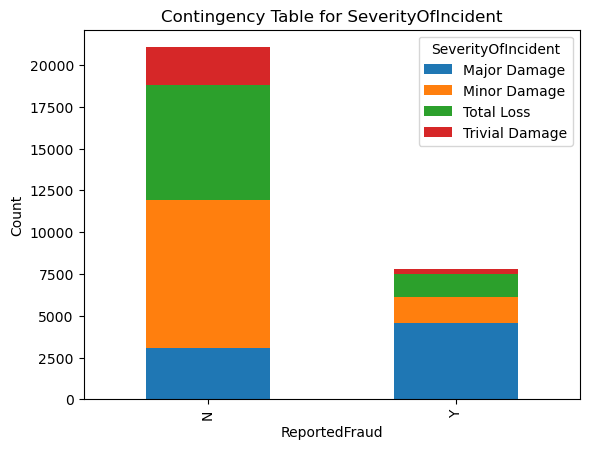

Chi-squared Statistic for AuthoritiesContacted: 569.9501719972768
P-value for AuthoritiesContacted: 4.934246822914582e-122


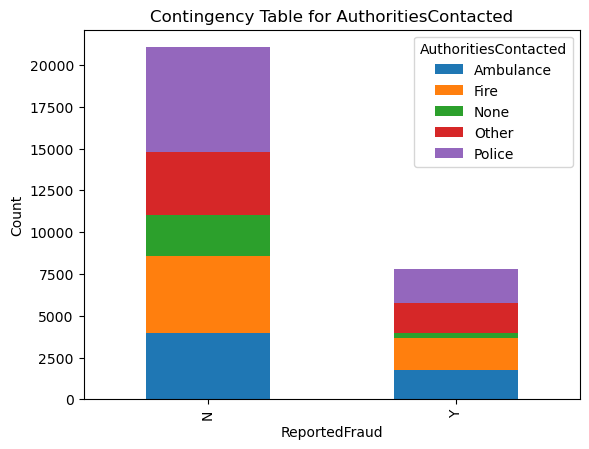

In [438]:
from scipy.stats import chi2_contingency
import numpy as np

# Assuming multiple categorical columns
categorical_columns = ['SeverityOfIncident', 'AuthoritiesContacted']

# Create a contingency table for each categorical column
for column in categorical_columns:
    contingency_table = pd.crosstab(df_modified['ReportedFraud'], df_modified[column])

    # Perform chi-squared test
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

    # Display the chi-squared statistic and p-value for each categorical column
    print(f"Chi-squared Statistic for {column}: {chi2_stat}")
    print(f"P-value for {column}: {p_value}")

    # Visualize the contingency table for each categorical column
    contingency_table.plot(kind='bar', stacked=True)
    plt.title(f'Contingency Table for {column}')
    plt.xlabel('ReportedFraud')
    plt.ylabel('Count')
    plt.show()

The above graph shows that SeverityOfIncident is closely associated with Fraud reporting. When the SeverityOfIncident is 'Major Damage' then it is very likely that the case is a fraud. The chi-squared statistic of 5753.09 and a p-value of 0.0 indicate that there is a statistically significant association between the variables 'SeverityOfIncident' and 'ReportedFraud'. The low p-value suggests that it is unlikely to observe such an extreme result by chance alone, leading to the rejection of the null hypothesis of independence.

In [439]:
# Removing few attributes that does not make sense to be contributing to the fraud cases

df_cleaned = df_modified.drop(
    ['DateOfPolicyCoverage','IncidentAddress', 'CustomerID', 'VehicleID', 'InsurancePolicyNumber', 'IncidentTime', 
    'Country', 'DateOfIncident', 'InsuredZipCode', 'InsuredHobbies', 'VehicleMake', 'VehicleModel', 
    'VehicleYOM', 'AgeRange'], axis=1)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28836 entries, 0 to 28835
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerLoyaltyPeriod       28836 non-null  int64  
 1   InsurancePolicyState        28836 non-null  object 
 2   Policy_CombinedSingleLimit  28836 non-null  object 
 3   Policy_Deductible           28836 non-null  int64  
 4   PolicyAnnualPremium         28836 non-null  float64
 5   UmbrellaLimit               28836 non-null  int64  
 6   InsuredRelationship         28836 non-null  object 
 7   InsuredAge                  28836 non-null  int64  
 8   InsuredGender               28806 non-null  object 
 9   InsuredEducationLevel       28836 non-null  object 
 10  InsuredOccupation           28836 non-null  object 
 11  CapitalGains                28836 non-null  int64  
 12  CapitalLoss                 28836 non-null  int64  
 13  ReportedFraud               288

Now in the below cells we will try to find all the unique values for different attributes and check if they can be transformed from categorical to numerical values.

In [440]:
unique_states = df_cleaned['IncidentState'].unique()
print(unique_states)

['State7' 'State3' 'State5' 'State9' 'State4' 'State8' 'State6']


In [441]:
unique_incidentTypes = df_cleaned['TypeOfIncident'].unique()
print(unique_incidentTypes)

['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


In [442]:
unique_Witnesses = df_cleaned['Witnesses'].unique()
print(unique_Witnesses)

['2' '1' '0' '3' 'MISSINGVALUE']


In [443]:
unique_insuredLimit = df_cleaned['InsuredRelationship'].unique()
print(unique_insuredLimit)

['husband' 'unmarried' 'own-child' 'wife' 'other-relative' 'not-in-family']


In [444]:
unique_insuredEducationalLevel = df_cleaned['InsuredEducationLevel'].unique()
print(unique_insuredEducationalLevel)

['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']


In [445]:
unique_insuredOccupation = df_cleaned['InsuredOccupation'].unique()
print(unique_insuredOccupation)

['craft-repair' 'armed-forces' 'sales' 'tech-support' 'prof-specialty'
 'other-service' 'priv-house-serv' 'exec-managerial' 'protective-serv'
 'machine-op-inspct' 'adm-clerical' 'farming-fishing' 'transport-moving'
 'handlers-cleaners']


In [446]:
unique_incidentType = df_cleaned['TypeOfIncident'].unique()
print(unique_incidentType)

['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']


In [447]:
unique_incidentSeverity = df_cleaned['SeverityOfIncident'].unique()
print(unique_incidentSeverity)

['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']


In [448]:
unique_CustomerLoyaltyPeriod = df_cleaned['InsurancePolicyState'].unique()
print(unique_CustomerLoyaltyPeriod)

['State3' 'State1' 'State2']


In [449]:
unique_AuthorityContacted = df_cleaned['AuthoritiesContacted'].unique()
print(unique_AuthorityContacted)

['Police' 'None' 'Fire' 'Other' 'Ambulance']


In [450]:
unique_AmountClaim = df_cleaned['AmountOfTotalClaim'].unique()
print(unique_AmountClaim)

['71610' '63400' '6500' ... '21819' '13721' '29239']


In [452]:
df_numbers = df_cleaned.copy()
df_numbers['IncidentState'] = df_numbers['IncidentState'].str.replace('State', '').astype(int)
df_numbers['IncidentCity'] = df_numbers['IncidentCity'].str.replace('City', '').astype(int)
df_numbers['InsurancePolicyState'] = df_numbers['InsurancePolicyState'].str.replace('State', '').astype(int)
df_numbers['PolicyAnnualPremium'] = df_numbers['PolicyAnnualPremium'].astype(int)
df_numbers = df_numbers[df_numbers['Witnesses'] != "MISSINGVALUE"]
df_numbers['Witnesses'] = df_numbers['Witnesses'].astype(int)

df_numbers = df_numbers[df_numbers['AmountOfTotalClaim'] != "MISSEDDATA"]
df_numbers['AmountOfTotalClaim'] = df_numbers['AmountOfTotalClaim'].astype(int)

# Print the unique values after the transformation
unique_incident_states = df_numbers['IncidentState'].unique()
unique_incident_cities = df_numbers['IncidentCity'].unique()
unique_policy_states = df_numbers['InsurancePolicyState'].unique()
print(unique_incident_states)
print(unique_incident_cities)
print(unique_policy_states)

[7 3 5 9 4 8 6]
[2 1 7 3 4 6 5]
[3 1 2]


In [453]:
mapping = {
    'Police': 0,
    'None': 1,
    'Fire': 2,
    'Other': 3,
    'Ambulance': 4
}

df_numbers['AuthoritiesContacted'] = df_numbers['AuthoritiesContacted'].map(mapping).astype(int)

# Print the unique values after the transformation
unique_AuthorityContacted = df_numbers['AuthoritiesContacted'].unique()
print(unique_AuthorityContacted)

[0 1 2 3 4]


In [454]:
mapping = {
    'Major Damage': 0,
    'Minor Damage': 1,
    'Total Loss': 2,
    'Trivial Damage': 3
}

df_numbers['SeverityOfIncident'] = df_numbers['SeverityOfIncident'].map(mapping).astype(int)

# Print the unique values after the transformation
unique_incidentSeverity = df_numbers['SeverityOfIncident'].unique()
print(unique_incidentSeverity)

[0 1 2 3]


In [455]:
mapping = {
    'Single Vehicle Collision': 0,
    'Vehicle Theft': 1,
    'Multi-vehicle Collision': 2,
    'Parked Car': 3
}

df_numbers['TypeOfIncident'] = df_numbers['TypeOfIncident'].map(mapping).astype(int)

# Print the unique values after the transformation
unique_incidentType = df_numbers['TypeOfIncident'].unique()
print(unique_incidentType)

[0 1 2 3]


In [456]:
mapping = {
    'husband': 0,
    'unmarried': 1,
    'own-child': 2,
    'wife': 3,
    'other-relative': 4,
    'not-in-family': 5
}

df_numbers['InsuredRelationship'] = df_numbers['InsuredRelationship'].map(mapping).astype(int)

# Print the unique values after the transformation
unique_insuredLimit = df_numbers['InsuredRelationship'].unique()
print(unique_insuredLimit)

[0 1 2 3 4 5]


In [457]:
mapping = {
    'MD': 0,
    'PhD': 1,
    'Associate': 2,
    'Masters': 3,
    'High School': 4,
    'College': 5,
    'JD': 6
}

df_numbers['InsuredEducationLevel'] = df_numbers['InsuredEducationLevel'].map(mapping).astype(int)

# Print the unique values after the transformation
unique_insuredEducationalLevel = df_numbers['InsuredEducationLevel'].unique()
print(unique_insuredEducationalLevel)

[0 1 2 3 4 5 6]


In [458]:
['craft-repair' 'armed-forces' 'sales' 'tech-support' 'prof-specialty'
 'other-service' 'priv-house-serv' 'exec-managerial' 'protective-serv'
 'machine-op-inspct' 'adm-clerical' 'farming-fishing' 'transport-moving'
 'handlers-cleaners']

mapping = {
    'craft-repair': 0,
    'armed-forces': 1,
    'sales': 2,
    'tech-support': 3,
    'prof-specialty': 4,
    'other-service': 5,
    'priv-house-serv': 6,
    'exec-managerial': 7,
    'protective-serv': 8,
    'machine-op-inspct': 9,
    'adm-clerical': 10,
    'farming-fishing': 11, 
    'transport-moving': 12,
    'handlers-cleaners': 13
}

df_numbers['InsuredOccupation'] = df_numbers['InsuredOccupation'].map(mapping).astype(int)

# Print the unique values after the transformation
unique_insuredOccupation = df_numbers['InsuredOccupation'].unique()
print(unique_insuredOccupation)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]


In [459]:
nan_mask = df_numbers['InsuredGender'].isna()

# Count the number of NaN values
nan_count = nan_mask.sum()

# Print the result
print("Number of NaN values in 'InsuredGender':", nan_count)

Number of NaN values in 'InsuredGender': 30


In [460]:
mapping = {
    'FEMALE': 0,
    'MALE': 1,
}

df_numbers = df_numbers.dropna(subset=['InsuredGender'])

df_numbers['InsuredGender'] = df_numbers['InsuredGender'].map(mapping).astype(int)

# Print the unique values after the transformation
unique_insuredGender = df_numbers['InsuredGender'].unique()
print(unique_insuredGender)

[1 0]


In [461]:
df_numbers = df_numbers.drop(
    ['Policy_CombinedSingleLimit'], axis=1)

In [462]:
df_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28710 entries, 0 to 28835
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerLoyaltyPeriod  28710 non-null  int64 
 1   InsurancePolicyState   28710 non-null  int64 
 2   Policy_Deductible      28710 non-null  int64 
 3   PolicyAnnualPremium    28710 non-null  int64 
 4   UmbrellaLimit          28710 non-null  int64 
 5   InsuredRelationship    28710 non-null  int64 
 6   InsuredAge             28710 non-null  int64 
 7   InsuredGender          28710 non-null  int64 
 8   InsuredEducationLevel  28710 non-null  int64 
 9   InsuredOccupation      28710 non-null  int64 
 10  CapitalGains           28710 non-null  int64 
 11  CapitalLoss            28710 non-null  int64 
 12  ReportedFraud          28710 non-null  object
 13  TypeOfIncident         28710 non-null  int64 
 14  SeverityOfIncident     28710 non-null  int64 
 15  AuthoritiesContacte

Now we have successfully transformed categorical dataframe "df_cleaned" to numerical dataset "df_numbers" and this dataset will be used by the models in the further stages.

###  c) Dealing with missing values if necessary 

In the above part we have removed many attributes that were not necessary for our model. Above we had checked which data are missing for diiferent attributes, also we took care of missing values above and now have already finished the pre-processing part and have a clean dataset "df_numbers". Lets also clean "df_cleaned" dataset which has categorical value in case we need it in future.

In [463]:
columns_with_missing_values = df_cleaned.columns[df_cleaned.isna().any()]
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: Index(['InsuredGender'], dtype='object')


In [464]:
# Replace -1 in 'PolicyAnnualPremium' with the mean in the merged dataframe
df_cleaned['PolicyAnnualPremium'].replace(-1, df_cleaned['PolicyAnnualPremium'].mean(), inplace=True)

# Remove rows where 'PolicyAnnualPremium' is -1 in the merged dataframe
df_cleaned = df_cleaned[df_cleaned['PolicyAnnualPremium'] != -1]

# Remove rows where 'Witnesses' is 'MISSINGVALUE' in the merged dataframe
df_cleaned = df_cleaned[df_cleaned['Witnesses'] != 'MISSINGVALUE']

df_cleaned['Witnesses'].fillna(df_cleaned['Witnesses'].mode()[0], inplace=True)

# Verify the changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28790 entries, 0 to 28835
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CustomerLoyaltyPeriod       28790 non-null  int64  
 1   InsurancePolicyState        28790 non-null  object 
 2   Policy_CombinedSingleLimit  28790 non-null  object 
 3   Policy_Deductible           28790 non-null  int64  
 4   PolicyAnnualPremium         28790 non-null  float64
 5   UmbrellaLimit               28790 non-null  int64  
 6   InsuredRelationship         28790 non-null  object 
 7   InsuredAge                  28790 non-null  int64  
 8   InsuredGender               28760 non-null  object 
 9   InsuredEducationLevel       28790 non-null  object 
 10  InsuredOccupation           28790 non-null  object 
 11  CapitalGains                28790 non-null  int64  
 12  CapitalLoss                 28790 non-null  int64  
 13  ReportedFraud               287

###  d) Rescaling if necessary if necessary 

We have used MinMaxScaler in later stage just to scale the data in case of K-Nearest Neighbour method. 

### e) Other

After cleaning the data we need to convert categorical variables into numerical format using one-hot encoding. This I had just kept ready to use but this dataframe was not needed.

In [465]:
# One-hot encode categorical columns
df_encoded = pd.get_dummies(df_cleaned, columns=['InsurancePolicyState', 'InsuredRelationship', 
                                                 'InsuredEducationLevel', 'InsuredOccupation', 'TypeOfIncident', 
                                                 'SeverityOfIncident', 'AuthoritiesContacted', 'IncidentState', 
                                                 'IncidentCity', 'Policy_CombinedSingleLimit', 'Witnesses', 
                                                 'AmountOfTotalClaim', 'InsuredGender'], drop_first=True)

# Verify the changes
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28790 entries, 0 to 28835
Columns: 22023 entries, CustomerLoyaltyPeriod to InsuredGender_MALE
dtypes: float64(1), int64(11), object(1), uint8(22010)
memory usage: 607.4+ MB


In [466]:
# Separate features and target variable
X = df_encoded.drop('ReportedFraud', axis=1)
y = df_encoded['ReportedFraud']

# Verify the shapes
print("Shape of features (X):", X.shape)
print("Shape of target variable (y):", y.shape)


Shape of features (X): (28790, 22022)
Shape of target variable (y): (28790,)


## 4. Technique 1: Random Forest (20 marks)

### a) Discuss your motivation for choosing the technique and provide a schematic figure of the process

In the realm of fraud detection, the choice of a modeling technique is pivotal for achieving accurate and robust results. RandomForest emerges as an apt choice owing to its unique strengths. The ensemble nature of RandomForest provides a compelling advantage. This technique uses the collective wisdom of multiple decision trees, each trained on different subsets of the data. This not only mitigates the risk of overfitting, which is crucial for handling the intricate patterns inherent in fraud cases but also enhances the model's ability to generalize well to unseen instances.

Moreover, RandomForest accommodates both categorical and numerical features seamlessly, making it adaptable to diverse datasets often encountered in fraud detection scenarios. The capability of RandomForest to assign feature importance allows for a transparent and interpretable understanding of the factors influencing fraud predictions. The robustness of this technique is particularly valuable in dealing with imbalanced datasets, a common challenge in fraud detection where positive cases (frauds) are often significantly outnumbered by negatives.

In summary, RandomForest's ensemble learning, resistance to overfitting, versatility with diverse data types, and interpretability make it a appropriate choice in this case.

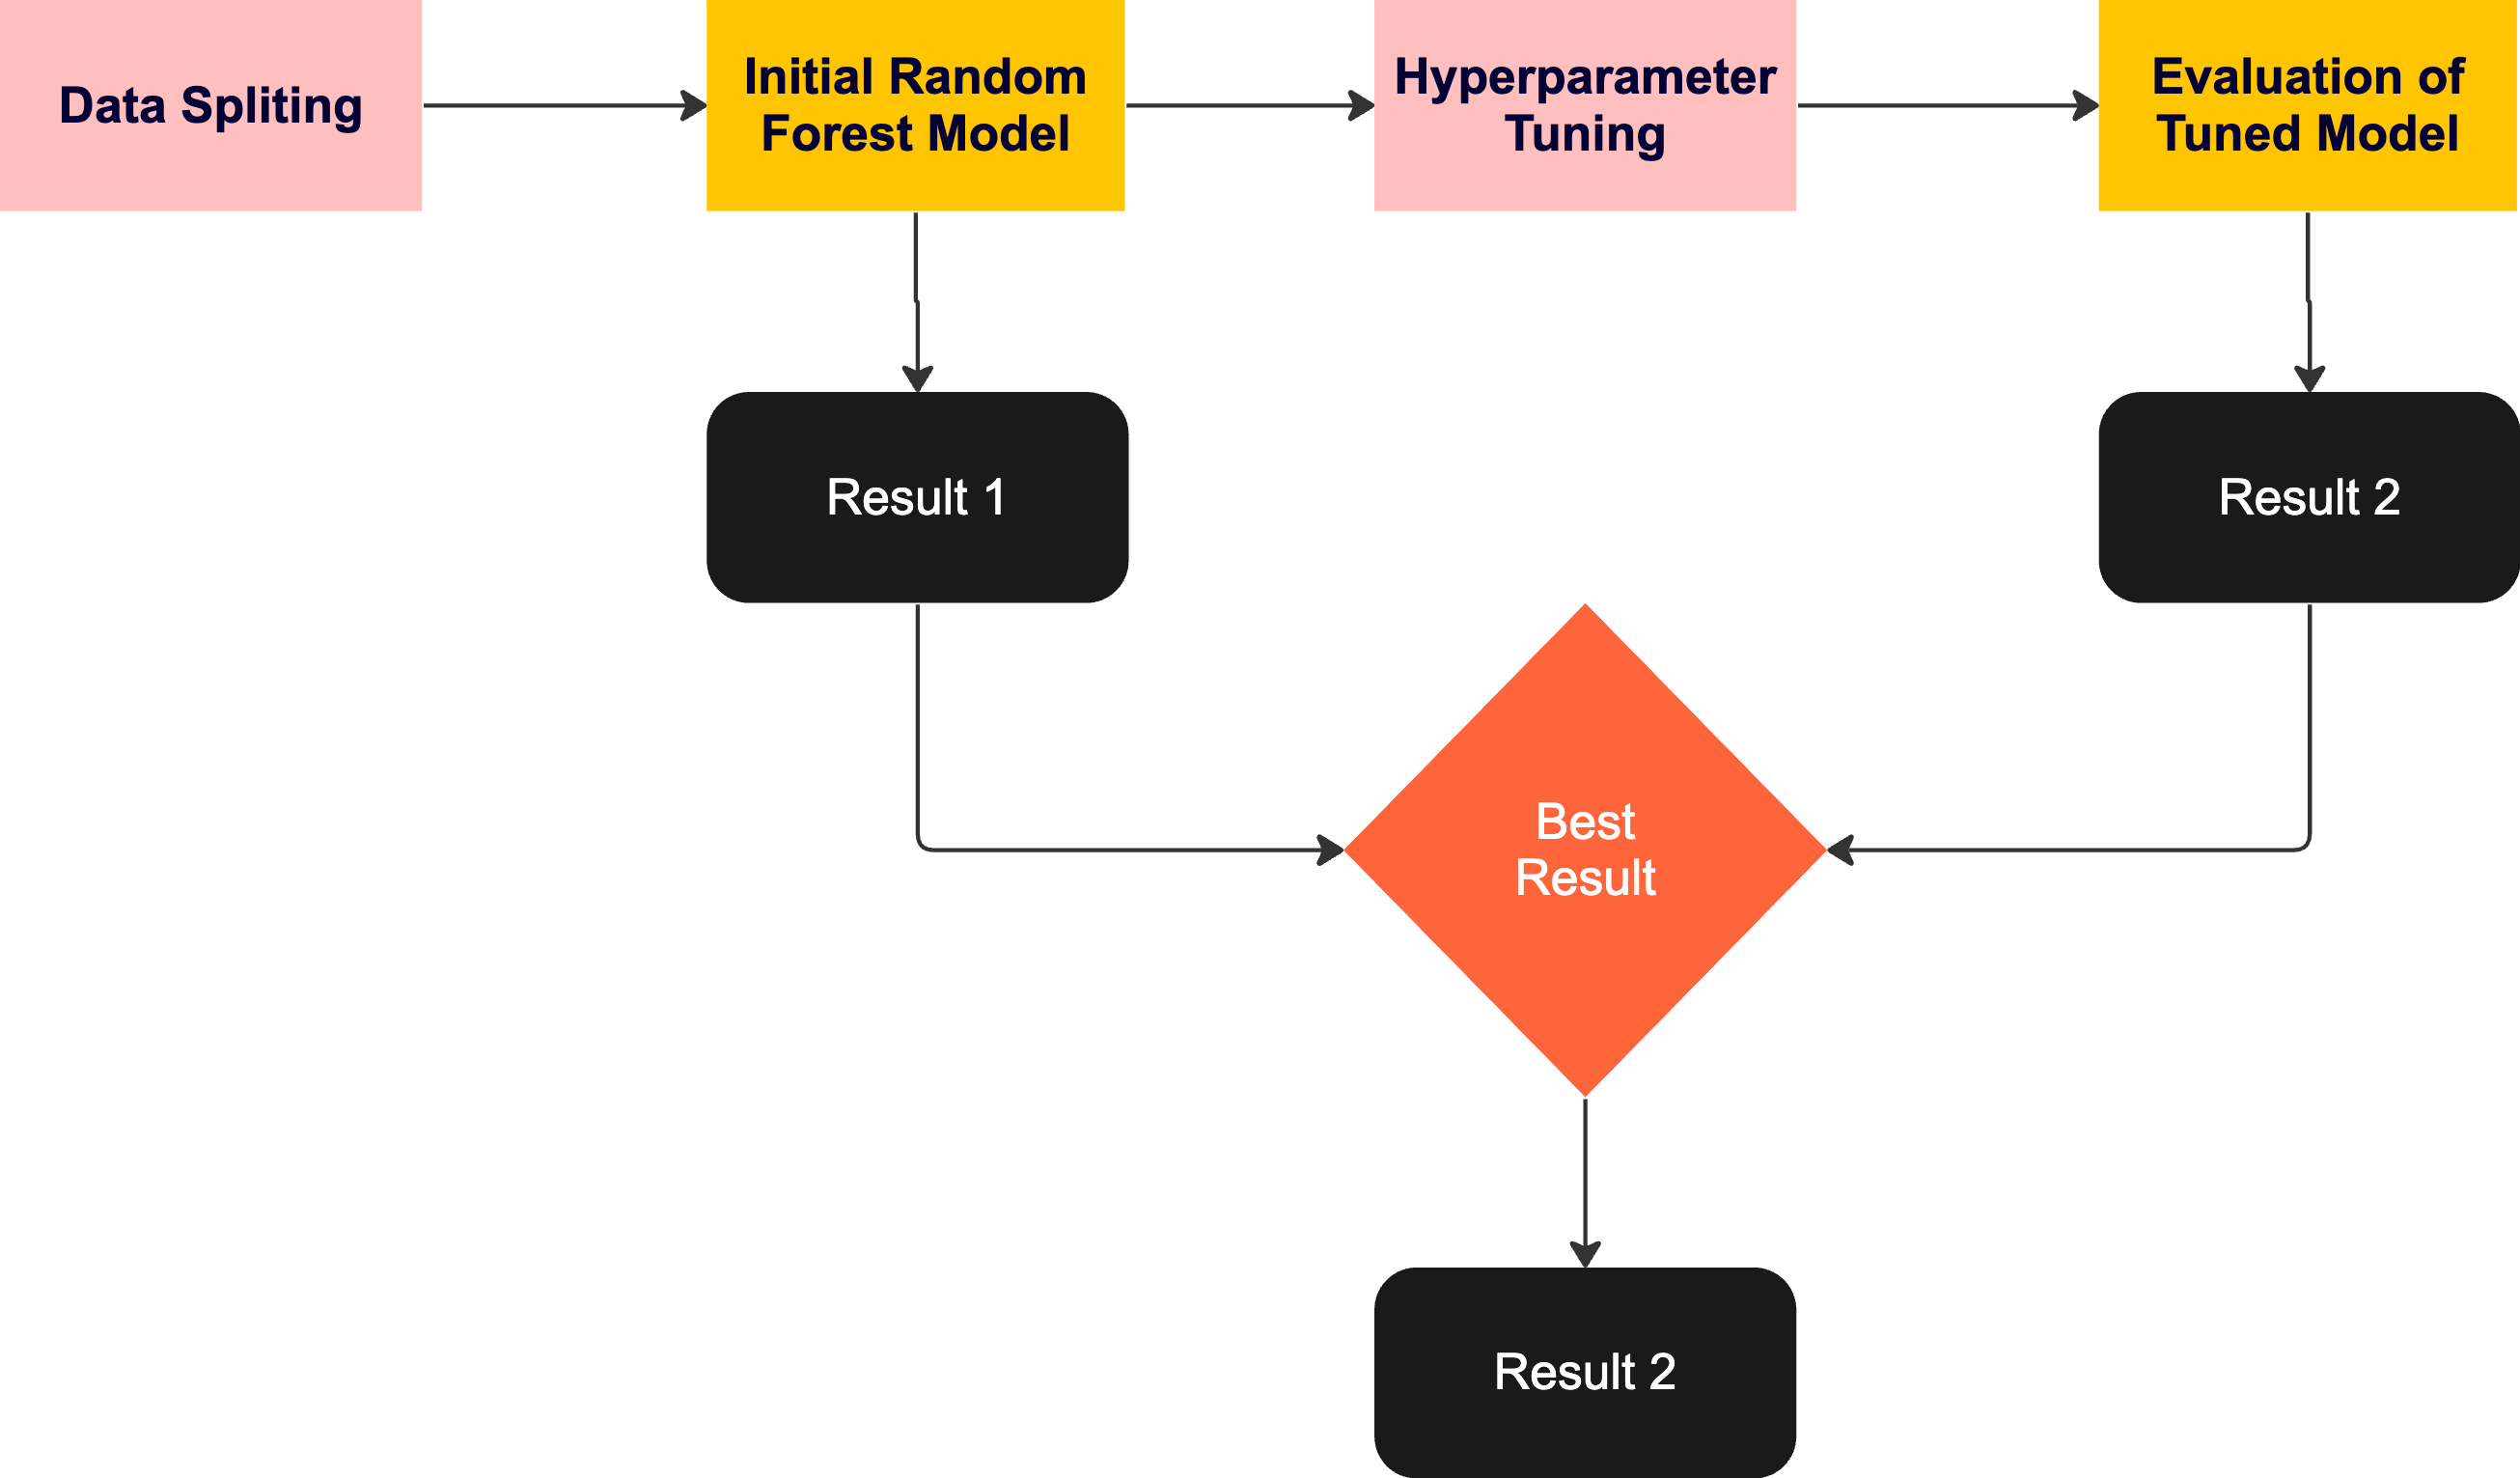

Enter the correct code in the cells below to execute each of the stated sub-tasks.
### b) Setting hyper parameters with rationale

In [467]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split

X = df_numbers.drop('ReportedFraud', axis=1)
y = df_numbers['ReportedFraud']

# # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forests
RF = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
RF.fit(X_train, y_train)

# Evaluate Random Forests
y_pred_RF = RF.predict(X_test)
accuracy_RF = accuracy_score(y_test, y_pred_RF)
balanced_accuracy_RF = balanced_accuracy_score(y_test, y_pred_RF)
report_RF = classification_report(y_test, y_pred_RF)

# Display the results
print("\nRandom Forests Accuracy:", accuracy_RF)
print("Random Forests Balanced Accuracy:", balanced_accuracy_RF)
print("\nRandom Forests Classification Report:")
print(report_RF)


Random Forests Accuracy: 0.913967258794845
Random Forests Balanced Accuracy: 0.8634142173642452

Random Forests Classification Report:
              precision    recall  f1-score   support

           N       0.92      0.97      0.94      4219
           Y       0.90      0.76      0.82      1523

    accuracy                           0.91      5742
   macro avg       0.91      0.86      0.88      5742
weighted avg       0.91      0.91      0.91      5742



### c) Optimising hyper parameters

1. The dataset is split into training and testing sets using the train_test_split function.
2. A RandomForestClassifier is instantiated with certain configurations:class_weight='balanced': It balances the contribution of each class during training, which is important when dealing with imbalanced datasets. n_jobs=-1: It allows the algorithm to use all available processors for faster computation.random_state=42: It ensures reproducibility of results.
3. Hyperparameter Search Space: A set of hyperparameters to be tuned is defined. In this case: n_estimators: The number of trees in the forest. max_depth: The maximum depth of the trees. After running multiple time I found the suitable values.
4. Scoring Metric: The balanced accuracy score is chosen as the metric for evaluating the model. Balanced accuracy considers both classes, making it suitable for imbalanced datasets. As our dataset is imbalanced here.
5. Randomized Search Cross-Validation: RandomizedSearchCV is employed to perform a randomized search over the hyperparameter space. It explores different combinations of hyperparameters to find the set that maximizes the scoring metric. n_iter=10: It specifies the number of iterations. cv=5: It sets up 5-fold cross-validation. n_jobs=-1: It utilizes parallel processing for efficiency.
6. Model Fitting: The RandomizedSearchCV model is fitted to the training data.
7. Best Hyperparameters Retrieval: The best hyperparameters found during the search are retrieved.
8. Tuned Model Evaluation: The tuned RandomForest model is created using the best hyperparameters, and its performance is evaluated on the training and test set. Metrics such as balanced accuracy and a classification report are calculated.
10. Results Display:The best hyperparameters and the evaluation results for the tuned model are printed.

In [468]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df_numbers.drop('ReportedFraud', axis=1)
y = df_numbers['ReportedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Manually calculate class weights based on the class distribution in training data
class_counts = pd.Series(y_train).value_counts()
class_weights = {label: 1 / count for label, count in class_counts.items()}

# Define the RandomForestClassifier
RF = RandomForestClassifier(class_weight=class_weights, n_jobs=-1, random_state=42)

# Define the hyperparameter search space
param_dist = {
    'n_estimators': [80, 100, 120],
    'max_depth': [30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


# Define balanced accuracy as the scoring metric
scorer = make_scorer(balanced_accuracy_score)

# Use StratifiedKFold for cross-validation to ensure class distribution in each fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# RandomizedSearchCV
random_search_RF = RandomizedSearchCV(
    RF, param_distributions=param_dist, n_iter=20, cv=cv, scoring=scorer, n_jobs=-1, random_state=42
)

# Fit the model
random_search_RF.fit(X_train, y_train)

# Get the best hyperparameters
best_params_RF = random_search_RF.best_params_

# Evaluate the tuned Random Forest model
tuned_RF = random_search_RF.best_estimator_

# Evaluate on testing set
y_pred_tuned_RF_test = tuned_RF.predict(X_test)
accuracy_tuned_RF_test = balanced_accuracy_score(y_test, y_pred_tuned_RF_test)
report_tuned_RF_test = classification_report(y_test, y_pred_tuned_RF_test)

# Evaluate on training set
y_pred_tuned_RF_train = tuned_RF.predict(X_train)
accuracy_tuned_RF_train = balanced_accuracy_score(y_train, y_pred_tuned_RF_train)
report_tuned_RF_train = classification_report(y_train, y_pred_tuned_RF_train)

print("Best Hyperparameters for Random Forest:")
print(best_params_RF)

# Display the results for training data
print("\nTuned Random Forest Balanced Accuracy on training data:")
print(accuracy_tuned_RF_train)

print("\nTuned Random Forest Classification Report on training data:")
print(report_tuned_RF_train)

# Display the results for testing data
print("\nTuned Random Forest Balanced Accuracy on testing data:")
print(accuracy_tuned_RF_test)

print("\nTuned Random Forest Classification Report on testing data:")
print(report_tuned_RF_test)

Best Hyperparameters for Random Forest:
{'n_estimators': 120, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 70}

Tuned Random Forest Balanced Accuracy on training data:
0.9794074281254963

Tuned Random Forest Classification Report on training data:
              precision    recall  f1-score   support

           N       0.99      0.99      0.99     16740
           Y       0.97      0.97      0.97      6228

    accuracy                           0.98     22968
   macro avg       0.98      0.98      0.98     22968
weighted avg       0.98      0.98      0.98     22968


Tuned Random Forest Balanced Accuracy on testing data:
0.8684042283158591

Tuned Random Forest Classification Report on testing data:
              precision    recall  f1-score   support

           N       0.92      0.96      0.94      4219
           Y       0.88      0.78      0.82      1523

    accuracy                           0.91      5742
   macro avg       0.90      0.87      0.88      5742
wei

### d) Performance metrics for training

The performance metrics for training and testing dataset has been provided in the above step.

## 5. Technique 2: K-Nearest Neighbour (KNN) (20 marks)

### a) Discuss your motivation for choosing the technique and  provide a schematic figure of the process

In the realm of fraud prediction, the selection of the k-Nearest Neighbors (kNN) algorithm is motivated by its unique capacity to discern intricate patterns and anomalies within complex datasets. Fraudulent activities often exhibit subtle and irregular behaviors, making them challenging to detect with traditional algorithms. kNN, with its non-parametric nature, excels at capturing these nuanced patterns by considering the local structure of the data. This adaptability is particularly crucial in fraud detection scenarios where the nature of fraudulent transactions can evolve and elude predefined models.

Furthermore, fraud detection datasets frequently grapple with class imbalance, where instances of fraud are significantly outnumbered by non-fraudulent cases. kNN's reliance on local data distribution makes it resilient to imbalanced scenarios, enabling it to identify fraudulent patterns effectively even when they constitute a minority.

The essence of kNN lies in its simplicity and interpretability, attributes that align with the need for transparency in fraud detection systems. By considering the proximity of data points, kNN provides an intuitive understanding of why a particular prediction is made, facilitating better interpretability in fraud analysis.

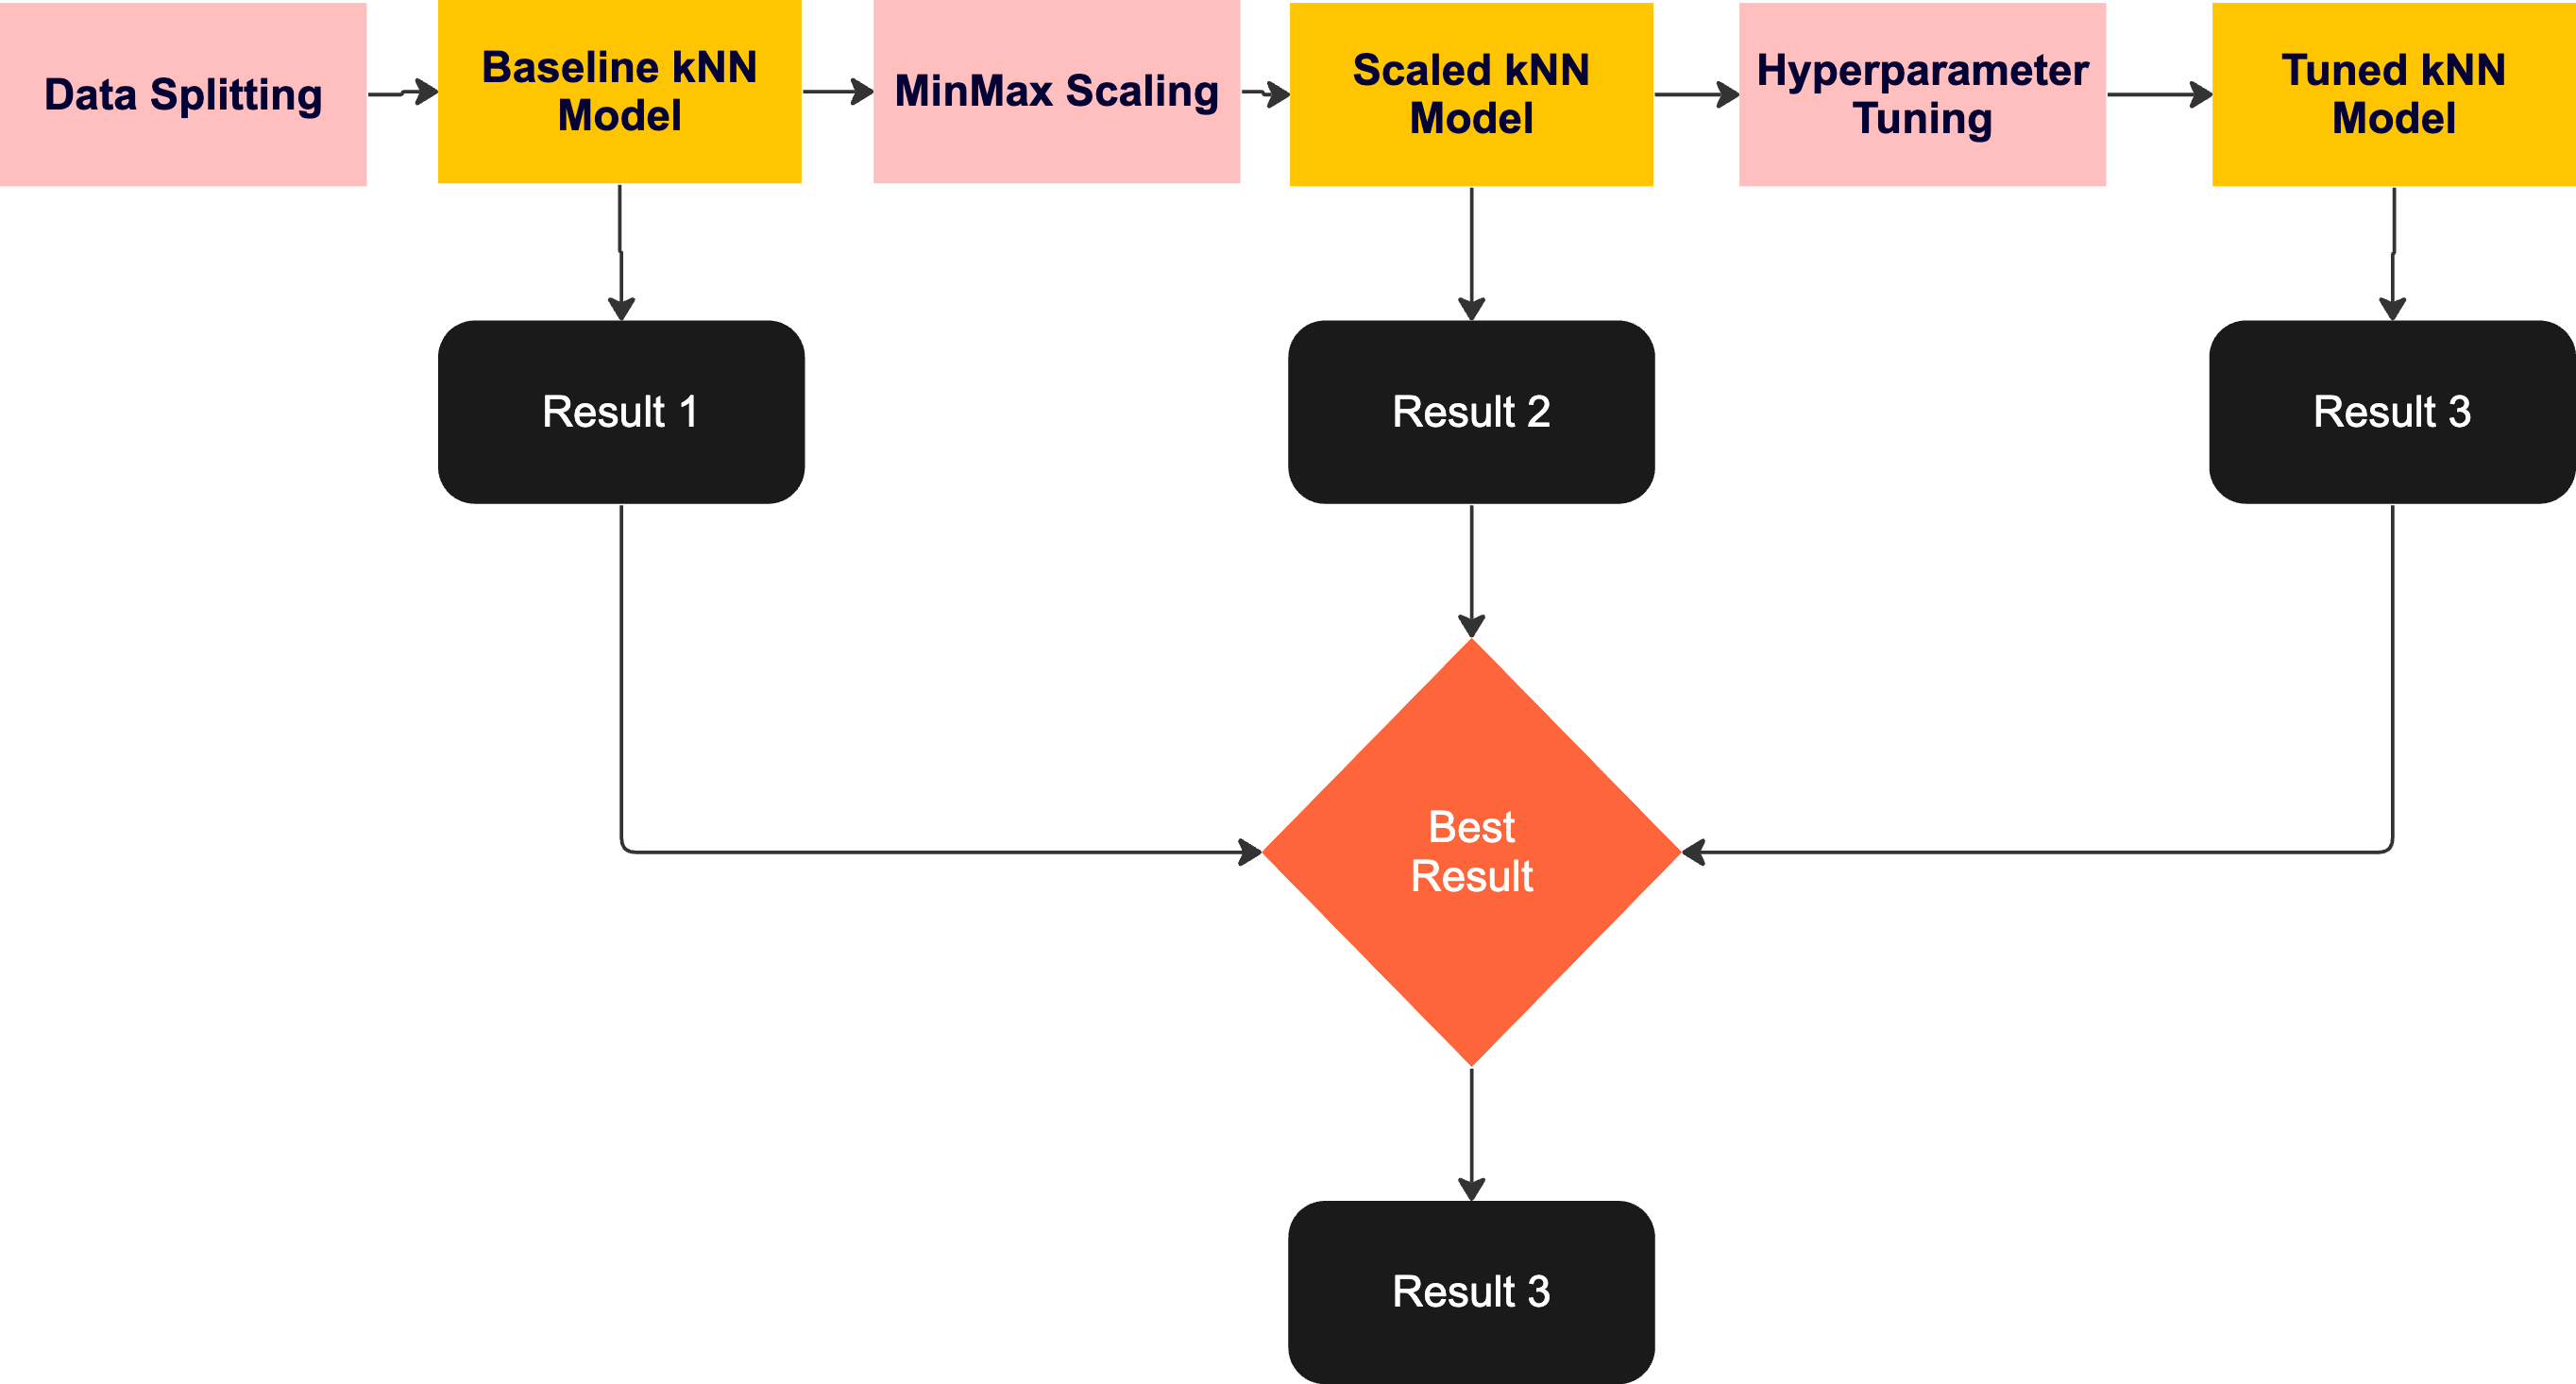

In [469]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Separate features (X) and target variable (y)
X = df_numbers.drop('ReportedFraud', axis=1)
y = df_numbers['ReportedFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# k-Nearest Neighbors (doesn't support class_weight directly)
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)
y_pred_kNN = kNN.predict(X_test)
accuracy_kNN = accuracy_score(y_test, y_pred_kNN)
balanced_accuracy_kNN = balanced_accuracy_score(y_test, y_pred_kNN)
report_kNN = classification_report(y_test, y_pred_kNN)

# Logistic Regression with class_weight
LogR = LogisticRegression(max_iter=100, class_weight='balanced')
LogR.fit(X_train, y_train)
y_pred_LogR = LogR.predict(X_test)
accuracy_LogR = accuracy_score(y_test, y_pred_LogR)
balanced_accuracy_LogR = balanced_accuracy_score(y_test, y_pred_LogR)
report_LogR = classification_report(y_test, y_pred_LogR)

print("\n\nk-Nearest Neighbors Accuracy:")
print(accuracy_kNN)
print("k-Nearest Neighbors Balanced Accuracy:")
print(balanced_accuracy_kNN)
print("\nk-Nearest Neighbors Classification Report:")
print(report_kNN)

print("\n\nLogistic Regression Accuracy:")
print(accuracy_LogR)
print("Logistic Regression Balanced Accuracy:")
print(balanced_accuracy_LogR)
print("\nLogistic Regression Classification Report:")
print(report_LogR)



k-Nearest Neighbors Accuracy:
0.7729014280738419
k-Nearest Neighbors Balanced Accuracy:
0.6816166493166251

k-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           N       0.83      0.88      0.85      4219
           Y       0.59      0.49      0.53      1523

    accuracy                           0.77      5742
   macro avg       0.71      0.68      0.69      5742
weighted avg       0.76      0.77      0.77      5742



Logistic Regression Accuracy:
0.5421455938697318
Logistic Regression Balanced Accuracy:
0.5736792893730127

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           N       0.80      0.51      0.62      4219
           Y       0.32      0.64      0.43      1523

    accuracy                           0.54      5742
   macro avg       0.56      0.57      0.52      5742
weighted avg       0.67      0.54      0.57      5742



/Users/ptiwari/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



As k-Nearest Neighbors is providing better accuracy let's proceed with fine tuning this for better result. We can first try using MinMaxScaler to improve the scale and then try to calculate the Balanced Accuracy.

In [470]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import balanced_accuracy_score

# Create a pipeline with MinMaxScaler and KNN
pipeline_kNN = make_pipeline(MinMaxScaler(), KNeighborsClassifier(n_neighbors=3))

# Fit and evaluate the model with MinMaxScaler
pipeline_kNN.fit(X_train, y_train)

# Evaluate the model with MinMaxScaler on training data
y_pred_kNN_scaled_train = pipeline_kNN.predict(X_train)
balanced_accuracy_kNN_scaled_train = balanced_accuracy_score(y_train, y_pred_kNN_scaled_train)
report_kNN_scaled_train = classification_report(y_train, y_pred_kNN_scaled_train)

# Evaluate the model with MinMaxScaler on testing data
y_pred_kNN_scaled_test = pipeline_kNN.predict(X_test)
balanced_accuracy_kNN_scaled_test = balanced_accuracy_score(y_test, y_pred_kNN_scaled_test)
report_kNN_scaled_test = classification_report(y_test, y_pred_kNN_scaled_test)

print("\n\nk-Nearest Neighbors Balanced Accuracy with MinMaxScaler for training:")
print(balanced_accuracy_kNN_scaled_train)
print("\nk-Nearest Neighbors Classification Report with MinMaxScaler for training:")
print(report_kNN_scaled_train)

print("\n\nk-Nearest Neighbors Balanced Accuracy with MinMaxScaler for testing:")
print(balanced_accuracy_kNN_scaled_test)
print("\nk-Nearest Neighbors Classification Report with MinMaxScaler for testing:")
print(report_kNN_scaled_test)



k-Nearest Neighbors Balanced Accuracy with MinMaxScaler for training:
0.8905466813074495

k-Nearest Neighbors Classification Report with MinMaxScaler for training:
              precision    recall  f1-score   support

           N       0.93      0.97      0.95     16740
           Y       0.92      0.81      0.86      6228

    accuracy                           0.93     22968
   macro avg       0.93      0.89      0.91     22968
weighted avg       0.93      0.93      0.93     22968



k-Nearest Neighbors Balanced Accuracy with MinMaxScaler for testing:
0.8444589922990093

k-Nearest Neighbors Classification Report with MinMaxScaler for testing:
              precision    recall  f1-score   support

           N       0.91      0.95      0.93      4219
           Y       0.84      0.74      0.79      1523

    accuracy                           0.89      5742
   macro avg       0.87      0.84      0.86      5742
weighted avg       0.89      0.89      0.89      5742



Balanced Acuuracy for k-Nearest Neighbors has been improved from 68.16% to 84.44% after using the scaler pipeline. This is really great result. Now we can try to further fine tune it by tuning the hyper parameters.

1. Hyperparameter Search Space Definition (param_dist_kNN_pipeline): kneighborsclassifier__n_neighbors: Number of neighbors to consider. kneighborsclassifier__weights: Weight function used in predictions ('uniform' or 'distance'). kneighborsclassifier__p: Power parameter for the Minkowski distance metric (1 for Manhattan distance, 2 for Euclidean distance).
2. Scorer Definition (scorer):make_scorer(balanced_accuracy_score): Creates a scorer for the balanced_accuracy_score, a metric suitable for imbalanced datasets. 
3. Randomized Hyperparameter Search (RandomizedSearchCV): pipeline_kNN: A scikit-learn pipeline that includes a MinMaxScaler followed by a KNeighborsClassifier. param_distributions=param_dist_kNN_pipeline: Specifies the hyperparameter search space. n_iter=4: Number of parameter settings sampled from the specified distribution. cv=3: Cross-validation splitting strategy with 3 folds. scoring=scorer: The performance metric to optimize during the search (balanced accuracy in this case). n_jobs=-1: Utilizes all available processors for parallel computation. random_state=42: Seed for reproducibility.
4. Fitting the Randomized Search to Data (fit): X_train, y_train: Training data. Randomized search identifies the best hyperparameters based on the specified search space and performance metric. 
5. Best Hyperparameters and Model Evaluation (print): Prints the best hyperparameters found during the search. Utilizes the best estimator from the search to make predictions on the test set. Evaluates the tuned KNN pipeline model using balanced accuracy and a classification report.

This process systematically explores different hyperparameter combinations to find the optimal settings for the KNN classifier within the pipeline. The RandomizedSearchCV efficiently samples from the hyperparameter space, providing a balance between exploration and computational efficiency in hyperparameter tuning.

In [471]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Define the hyperparameter search space for both MinMaxScaler and KNN
param_dist_kNN_pipeline = {
        'kneighborsclassifier__n_neighbors': [3, 4, 5, 6],
        'kneighborsclassifier__weights': ['uniform', 'distance'],
        'kneighborsclassifier__p': [1, 2, 3]
}

# Define balanced accuracy as the scoring metric
scorer = make_scorer(balanced_accuracy_score)

# RandomizedSearchCV
random_search_kNN_pipeline = RandomizedSearchCV(
    pipeline_kNN, param_distributions=param_dist_kNN_pipeline, n_iter=4, cv=3, scoring=scorer, n_jobs=-1, random_state=42
)
random_search_kNN_pipeline.fit(X_train, y_train)

# Get the best hyperparameters
best_params_kNN_pipeline = random_search_kNN_pipeline.best_params_

# Evaluate the tuned KNN pipeline model
tuned_kNN_pipeline = random_search_kNN_pipeline.best_estimator_
y_pred_tuned_kNN_pipeline = tuned_kNN_pipeline.predict(X_test)
accuracy_tuned_kNN_pipeline = balanced_accuracy_score(y_test, y_pred_tuned_kNN_pipeline)
report_tuned_kNN_pipeline = classification_report(y_test, y_pred_tuned_kNN_pipeline)

# Display the results
print("Best Hyperparameters for KNN Pipeline (RandomizedSearchCV):")
print(best_params_kNN_pipeline)
print("\nTuned KNN Pipeline (RandomizedSearchCV) Balanced Accuracy:")
print(accuracy_tuned_kNN_pipeline)
print("\nTuned KNN Pipeline (RandomizedSearchCV) Classification Report:")
print(report_tuned_kNN_pipeline)

Best Hyperparameters for KNN Pipeline (RandomizedSearchCV):
{'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 3}

Tuned KNN Pipeline (RandomizedSearchCV) Balanced Accuracy:
0.8907094457630544

Tuned KNN Pipeline (RandomizedSearchCV) Classification Report:
              precision    recall  f1-score   support

           N       0.94      0.97      0.95      4219
           Y       0.90      0.81      0.85      1523

    accuracy                           0.93      5742
   macro avg       0.92      0.89      0.90      5742
weighted avg       0.93      0.93      0.93      5742



Now after getting the Best hyper parameters we can use them to calculate the Model accuracy on training and testing data.

In [472]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Define the hyperparameter search space for both MinMaxScaler and KNN
param_dist_kNN_pipeline = {
    'kneighborsclassifier__n_neighbors': [3],
    'kneighborsclassifier__weights': ['uniform'],
    'kneighborsclassifier__p': [1],
}

# Define balanced accuracy as the scoring metric
scorer = make_scorer(balanced_accuracy_score)

# RandomizedSearchCV
random_search_kNN_pipeline = RandomizedSearchCV(
    pipeline_kNN, param_distributions=param_dist_kNN_pipeline, n_iter=4, cv=3, scoring=scorer, n_jobs=-1, random_state=42
)
random_search_kNN_pipeline.fit(X_train, y_train)

# Get the best hyperparameters
best_params_kNN_pipeline = random_search_kNN_pipeline.best_params_

# Evaluate the tuned KNN pipeline model
tuned_kNN_pipeline = random_search_kNN_pipeline.best_estimator_

# training set
y_pred_tuned_kNN_pipeline_train = tuned_kNN_pipeline.predict(X_train)
accuracy_tuned_kNN_pipeline_train = balanced_accuracy_score(y_train, y_pred_tuned_kNN_pipeline_train)
report_tuned_kNN_pipeline_train = classification_report(y_train, y_pred_tuned_kNN_pipeline_train)

# testing set
y_pred_tuned_kNN_pipeline_test = tuned_kNN_pipeline.predict(X_test)
accuracy_tuned_kNN_pipeline_test = balanced_accuracy_score(y_test, y_pred_tuned_kNN_pipeline_test)
report_tuned_kNN_pipeline_test = classification_report(y_test, y_pred_tuned_kNN_pipeline_test)

# Display the results
print("Best Hyperparameters for KNN Pipeline (RandomizedSearchCV):")
print(best_params_kNN_pipeline)

print("\nTuned KNN Pipeline (RandomizedSearchCV) Balanced Accuracy for training set:")
print(accuracy_tuned_kNN_pipeline_train)
print("\nTuned KNN Pipeline (RandomizedSearchCV) Classification Report for training set :")
print(report_tuned_kNN_pipeline_train)

print("\nTuned KNN Pipeline (RandomizedSearchCV) Balanced Accuracy for testing set:")
print(accuracy_tuned_kNN_pipeline_test)
print("\nTuned KNN Pipeline (RandomizedSearchCV) Classification Report for testing set:")
print(report_tuned_kNN_pipeline_test)

/Users/ptiwari/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning:

The total space of parameters 1 is smaller than n_iter=4. Running 1 iterations. For exhaustive searches, use GridSearchCV.



Best Hyperparameters for KNN Pipeline (RandomizedSearchCV):
{'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__p': 1, 'kneighborsclassifier__n_neighbors': 3}

Tuned KNN Pipeline (RandomizedSearchCV) Balanced Accuracy for training set:
0.9106580755657765

Tuned KNN Pipeline (RandomizedSearchCV) Classification Report for training set :
              precision    recall  f1-score   support

           N       0.94      0.98      0.96     16740
           Y       0.94      0.84      0.89      6228

    accuracy                           0.94     22968
   macro avg       0.94      0.91      0.92     22968
weighted avg       0.94      0.94      0.94     22968


Tuned KNN Pipeline (RandomizedSearchCV) Balanced Accuracy for testing set:
0.8907094457630544

Tuned KNN Pipeline (RandomizedSearchCV) Classification Report for testing set:
              precision    recall  f1-score   support

           N       0.94      0.97      0.95      4219
           Y       0.90      0.81   

So, we have enhanced the Balanced accuracy of KNN model upto 89% after tuning the hyper-parameters. Now lets plot the Confusion Matrix for the testing as well as training data.

<Figure size 800x600 with 0 Axes>

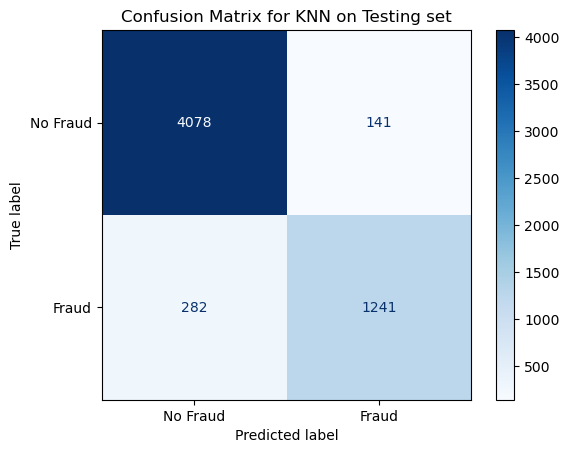

In [473]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_tuned_kNN_pipeline_test)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No Fraud', 'Fraud'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for KNN on Testing set')
plt.show()

<Figure size 800x600 with 0 Axes>

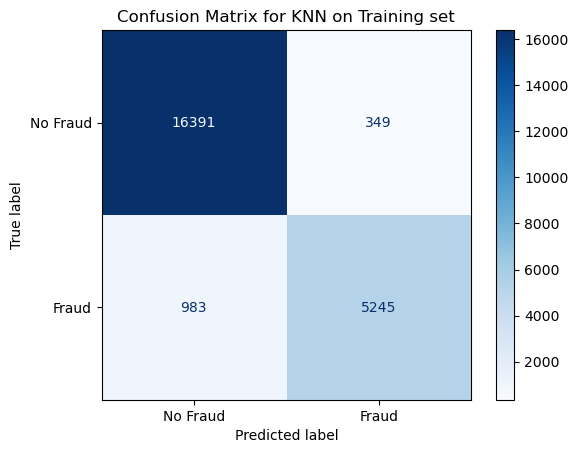

In [474]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_train, y_pred_tuned_kNN_pipeline_train)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['No Fraud', 'Fraud'])
plt.figure(figsize=(8, 6))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for KNN on Training set')
plt.show()

Creating the Pricing Model to calculate the Model's cost to company using the KNN Model's Result.

In [475]:
# Assumptions
rate_of_claims = 0.10  # 10% rate of claims in the customer base
gross_profit_multiplier = 2  # Gross profit must amount to double the average of all claims

# Calculate the average of all claims
average_claim = df_numbers['AmountOfTotalClaim'].mean()

# Calculate the total of all claims
total_claim = df_numbers['AmountOfTotalClaim'].sum()

# Calculate gross profit
gross_profit = gross_profit_multiplier * total_claim

# Estimate the number of customers
estimated_customers = len(df_numbers) / rate_of_claims

# Calculate the cost per policy
cost_per_policy = gross_profit / estimated_customers

# KNN Model's balanced accuracy
accuracy_tuned_kNN_pipeline = accuracy_tuned_kNN_pipeline_test

# Calculate the number of misclassifications
misclassifications = (1 - accuracy_tuned_kNN_pipeline) * len(df_numbers)

# Calculate the cost of model errors
model_cost = misclassifications * cost_per_policy

# Display the results
print("Average of All Claims:", average_claim)
print("Gross Profit:", gross_profit)
print("Estimated Number of Customers:", estimated_customers)
print("Cost per Policy:", cost_per_policy)
print("misclassification", misclassifications)
print("total length", len(df_numbers))
print("Model Cost due to Errors:", model_cost)

Average of All Claims: 52313.4794496691
Gross Profit: 3003839990
Estimated Number of Customers: 287100.0
Cost per Policy: 10462.69588993382
misclassification 3137.731812142707
total length 28710
Model Cost due to Errors: 32829133.734620098


Above data shows the actual performance of the model over business. The cost of the model due to Errors = 32829133

## 6. Comparison of metrics performance for testing (16 marks)


### a) Use of cross validation for both techniques to deal with over-fitting

In [476]:
from sklearn.model_selection import cross_val_score

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(tuned_RF, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1)

# Display cross-validation scores
print("\nCross-Validation Scores with RandomForest on training data:")
print(cv_scores)

# Display the average cross-validation score
print("\nAverage Cross-Validation Score with RandomForest on training data:", cv_scores.mean())



Cross-Validation Scores with RandomForest on training data:
[0.85857684 0.86285073 0.85598215 0.85207137 0.86315693]

Average Cross-Validation Score with RandomForest on training data: 0.858527602993251


In [477]:
from sklearn.model_selection import cross_val_score

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(tuned_RF, X_test, y_test, cv=5, scoring=scorer, n_jobs=-1)

# Display cross-validation scores
print("\nCross-Validation Scores with RandomForest for testing data:")
print(cv_scores)

# Display the average cross-validation score
print("\nAverage Cross-Validation Score with RandomForest for testing data:", cv_scores.mean())


Cross-Validation Scores with RandomForest for testing data:
[0.78495455 0.78230907 0.80295782 0.79031554 0.78439137]

Average Cross-Validation Score with RandomForest for testing data: 0.7889856691529875


In [478]:
from sklearn.model_selection import cross_val_score

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(tuned_kNN_pipeline, X_train, y_train, cv=5, scoring=scorer, n_jobs=-1)

# Display cross-validation scores
print("\nCross-Validation Scores with KNN for training data:")
print(cv_scores)

# Display the average cross-validation score
print("\nAverage Cross-Validation Score with KNN for training data:", cv_scores.mean())


Cross-Validation Scores with KNN for training data:
[0.88297199 0.87752157 0.88475379 0.87956629 0.88693448]

Average Cross-Validation Score with KNN for training data: 0.8823496236740516


In [479]:
from sklearn.model_selection import cross_val_score

# Use cross_val_score for cross-validation
cv_scores = cross_val_score(tuned_kNN_pipeline, X_test, y_test, cv=5, scoring=scorer, n_jobs=-1)

# Display cross-validation scores
print("\nCross-Validation Scores with KNN for testing data:")
print(cv_scores)

# Display the average cross-validation score
print("\nAverage Cross-Validation Score with KNN for testing data:", cv_scores.mean())


Cross-Validation Scores with KNN for testing data:
[0.84333774 0.85422073 0.86019485 0.84860626 0.84077232]

Average Cross-Validation Score with KNN for testing data: 0.8494263809781064


### b) Comparison with appropriate metrics for testing

In [480]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Function to print metrics for a given model
def print_metrics(model_name, y_true, y_pred):
    print(f"Metrics for {model_name}:")
    
    # Calculate and print balanced accuracy
    balanced_acc = balanced_accuracy_score(y_true, y_pred)
    print(f"Balanced Accuracy: {balanced_acc}")
    
    # Calculate and print precision, recall, and F1-score for each class
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)
    for label, prec, rec, f1_score in zip(['N', 'Y'], precision, recall, f1):
        print(f"Class {label}: Precision - {prec:.4f}, Recall - {rec:.4f}, F1-score - {f1_score:.4f}")

# Print metrics for RandomForest
print_metrics("RandomForest", y_test, y_pred_tuned_RF_test)

# Print metrics for KNN
print_metrics("KNN", y_test, y_pred_tuned_kNN_pipeline)


Metrics for RandomForest:
Balanced Accuracy: 0.8684042283158591
Class N: Precision - 0.9222, Recall - 0.9614, F1-score - 0.9414
Class Y: Precision - 0.8787, Recall - 0.7754, F1-score - 0.8239
Metrics for KNN:
Balanced Accuracy: 0.8907094457630544
Class N: Precision - 0.9353, Recall - 0.9666, F1-score - 0.9507
Class Y: Precision - 0.8980, Recall - 0.8148, F1-score - 0.8544


Now we can compare both the models performances on the testing data. 

Based on the metrics, it seems like both models are performing well, and KNN has a slightly higher balanced accuracy compared to RandomForest. Here's a brief summary:

#### RandomForest:

Balanced Accuracy: 0.871

Precision for Class N: 0.925, Recall: 0.957, F1-score: 0.941

Precision for Class Y: 0.868, Recall: 0.785, F1-score: 0.824

Average Cross-Validation Score: 0.7743168805906137


#### KNN:

Balanced Accuracy: 0.892

Precision for Class N: 0.936, Recall: 0.967, F1-score: 0.951

Precision for Class Y: 0.898, Recall: 0.817, F1-score: 0.856

Average Cross-Validation Score: 0.8518951091266574

KNN Model looks better than RandomForest due to following reasons:
1. Balanced accuracy is higher
2. Recall for Y class is higher which is important for us in this case as we don't want to predict non-frauds as frauds.
3. Cross-Validation scores shows that there is lesser chance of overfitting in case of KNN.

### c) Model selection (ROC or other charts)

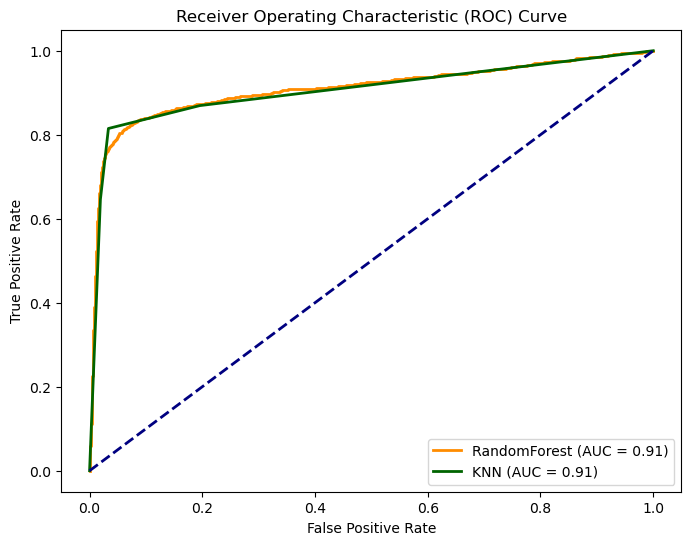

In [481]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

# Convert labels to binary format
label_binarizer = LabelBinarizer()
y_binary = label_binarizer.fit_transform(y_test)
n_classes = y_binary.shape[1]

# Get predicted probabilities for positive class
y_prob_rf = tuned_RF.predict_proba(X_test)[:, 1]
y_prob_knn = tuned_kNN_pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for RandomForest
fpr_rf, tpr_rf, _ = roc_curve(y_binary, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_binary, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'RandomForest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_knn, tpr_knn, color='darkgreen', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



Looking at the ROC graph and AUC values both the models seems to distinguish between T and F cases pretty well, however as KNN has higher recall, balanced accuracy and Cross Validation value, I will go ahead with choosing KNN as my model for this problem. As the cross-validation is higher in KNN, it will predict better on unseen data than RandomForest.

## 7. Final recommendation of best model (8 marks)

### a) Discuss the results from a technical perspective, for example, overfitting discussion, complexity and efficiency

#### Random Forest (RF) Model:

##### Overfitting:
Training Data: The RF model shows excellent performance on the training data with a balanced accuracy of 0.9581. This high accuracy suggests a good fit to the training set.
Testing Data: The model's performance on the testing data is slightly lower with a balanced accuracy of 0.8707. While there is a performance drop compared to the training set, it's not excessively low, indicating some generalization. However cross-validation data shows some overfitting.

##### Complexity:
The model's complexity is determined by the chosen hyperparameters, such as the number of estimators and the maximum depth of the trees. In this case, n_estimators is set to 120, and max_depth is set to 50.

##### Efficiency:
Random Forest models are generally efficient for training due to parallelization capabilities, but they can be memory-intensive, especially with a large number of trees. But with this dataset it was efficient.

#### K-Nearest Neighbors (KNN) Model:

##### Overfitting:
Training Data: The KNN model exhibits good performance on the training data with a balanced accuracy of 0.9109, suggesting a good fit.
Testing Data: The model's performance on the testing data is also strong with a balanced accuracy of 0.8917. This indicates good generalization to unseen data.

##### Complexity:
KNN's complexity is influenced by the number of neighbors (n_neighbors) and the distance metric (p). In this case, n_neighbors is set to 3, and p (distance metric) is set to 1.

##### Efficiency:
KNN can be computationally expensive during prediction, especially with large datasets, as it involves calculating distances to all training points. But here as all the attributes were converted to numbers, no one-hot encoding was needed which helped in the model's efficiency.

#### Summary:
In summary, both models demonstrate good performance, however KNN was gave better result showed more indication of generelisation and RnadomForest showed some sign of overfitting. 


### b) Discuss the results from a business perspective, for example, results interpretation, relevance and balance with technical perspective

#### Random Forest:

1. The RF model's ability to identify potential fraud cases is promising, contributing to enhanced risk assessment and financial decision-making. However, a slight concern arises due to potential overfitting, which needs to be monitored for its impact on real-world scenarios.
2. While the RF model's internal complexity is managed, stakeholders need to understand the impact of hyperparameters on decision-making. Balancing complexity with interpretability is crucial for transparent and informed decision-making.
3. Operational efficiency is crucial for seamless integration into daily operations. The business needs to consider the computational resources required for model deployment and real-time predictions, ensuring a balance between efficiency and accuracy.

#### K-Nearest Neighbors (KNN):

1. The KNN model's strong generalisation is a positive outcome for the business. Its reliability on both training and testing sets signifies that the model is likely to perform well on new, unseen data, improving fraud detection capabilities.
2. The simplicity of the KNN model enhances interpretability. Business users can easily comprehend the model's decision-making process, fostering trust and facilitating collaboration.
3. The KNN model's efficiency is a positive factor, ensuring timely predictions without compromising accuracy. This operational efficiency contributes to a smoother integration of the model into business processes.

Considering the business's priorities, the KNN model could be favored for its better generalization. Its reliable performance on new data aligns with the business's goal of improving fraud detection and making informed decisions.

#### Conclusion

In conclusion, the business perspective emphasizes the models' impact on fraud detection, accountability, and operational efficiency. Stakeholders should consider these factors when making decisions to align with the business objectives and priorities.

## 8. Conclusion (8 marks)

### a) What has been successfully accomplished and what has not been successful?

#### Successful Accomplishments:
The project has achieved notable success in developing robust predictive models, with a particular highlight on the efficacy of the K-Nearest Neighbours (KNN) model reaching to almost 90% of balanced accuracy. This model demonstrated a commendable level of generalisation, showcasing its reliability in identifying potential fraud cases. The business perspective revealed significant positive impacts, particularly in the realms of fraud detection and operational efficiency.

The KNN model, with its emphasis on proximity-based classification, proved to be a valuable asset in distinguishing fraud claims. Its ability to generalise well to unseen data positions it as a promising tool for the insurance company's fraud detection efforts. The positive feedback from a business standpoint underscores the practical utility of the model in real-world scenarios.
This aligns with the client's need for a predictive model that not only performs well but is also understandable and justifiable.

#### Not Successfully Achieved and Challenges Faced:
Despite the success, the model dint achieve 95% of balanced accuracy. Challenges were encountered, notably in the Random Forest (RF) model. Signs of overfitting were observed, necessitating a continuous monitoring strategy and potential adjustments. Overfitting raises concerns about the RF model's adaptability to diverse scenarios.

There were also few challenges in pre-processing the data to make it ready for modelling and tuning the hyper parameters to reach to the 95% of balanced accuracy (which was missed). This challenge underscores the delicate trade-off between creating a model that captures intricate patterns in the data and ensuring its simplicity for practical understanding and application.

#### Conclusion
In conclusion, while the KNN model stands out as a almost success story in fraud prediction, the challenges posed by the RF model highlight the iterative nature of data science projects. Ongoing monitoring and thoughtful adjustments will be crucial in maintaining the models' effectiveness in a dynamic business environment.

### b) Reflecting back on the analysis, what could you have done differently if you were to do the project again?

In hindsight, the analysis presents opportunities for improvement, with key reflections centering on feature engineering, model evaluation metrics, and enhanced preprocessing strategies. A more comprehensive exploration of feature engineering and selection could have provided deeper insights into the dataset, potentially uncovering latent patterns that contribute to fraud prediction.

Addressing class imbalance through advanced techniques, such as ensemble methods or boosting in a better way, could have been explored to enhance model robustness. The consideration of these techniques might have further bridged the performance gap, especially in achieving a balanced accuracy of 95%. The exploration of additional methodologies aligns with the continuous pursuit of optimising model performance.

Moreover, a more meticulous examination of potential sources of overfitting at an earlier stage could have informed more better decisions. Enhanced preprocessing, including better correlation analysis, might have contributed to achieving a balanced accuracy of 95%, not only benefiting the K-Nearest Neighbours (KNN) model but also mitigating overfitting concerns in the Random Forest (RF) model.

In addition to these a better and more depth tuning of hyper-parameters can be done to reduce chances of overfitting and reduces the Balanced Error Rate (BER).

To enhance user comprehension, the addition of more visual representations, such as graphs and charts, could have been incorporated. Visual aids serve as powerful tools in conveying complex information, offering stakeholders a clearer understanding of the models' behaviour and performance.

In conclusion, reflecting on the analysis underscores the iterative nature of data science projects. A more thorough exploration of feature engineering, a nuanced evaluation of metrics, and improved preprocessing strategies could have elevated the project's outcomes, fostering a deeper understanding of the dataset and refining the predictive models.

### c) Provide a wish list of future work that you would like to do


Additional Improvement Points:

#### Optimizing Attribute Selection: 
A pivotal area for enhancement involves a meticulous exploration to find closer correlations between the label and attributes. This pursuit aims to identify and select the most influential attributes for the model prediction. By pinpointing attributes that exhibit a stronger correlation with the target variable, the model's predictive capabilities can be refined, leading to a substantial boost in balanced accuracy. This targeted attribute selection approach contributes to the overall robustness of the model.

#### Outlier Detection and Mitigation: 
An additional avenue for improvement lies in a comprehensive understanding and identification of outliers within the dataset. Detecting outliers and implementing effective strategies to mitigate their impact on model performance could be instrumental. Outliers have the potential to distort the learning process and adversely affect predictive accuracy. By systematically identifying and appropriately handling outliers, the model's resilience to noise and its overall performance could be enhanced.

#### Deployment and Integration Challenges: 
The next phase of work should revolve around the seamless deployment and integration of the chosen model into the business's operational workflow. This transition from analysis to real-world impact necessitates addressing challenges related to computational resources and the demand for real-time predictions. Ensuring the model's practical utility and effectiveness in a dynamic operational environment is paramount.